# School Catchment Analysis
## Austin Granular Model

Goals
1. Report on number of private schools within AISD boundaries
2. Number of private schools in the 5-county Austin-Round Rock MSA
3. ZCTA-level private school attendance vs ZCTA-level private school capacity
4. Number of schools changed between the 2015-2016 SABS survey and the 2019 TEA school enrollment report

In [1]:
import matplotlib.pyplot as plt
import contextily as cx
import pandas as pd
import geopandas as gpd
from geocodetools import flatten_excel, address_validator, geocode
import rpy2.robjects as ro
from rpy2.robjects import r, pandas2ri
from rpy2.robjects.packages import importr
pandas2ri.activate()

In [2]:
import logging
gpd_logger = logging.getLogger('geopandas')
gpd_logger.setLevel(logging.WARNING)
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING)
fi_logger = logging.getLogger('fiona')
fi_logger.setLevel(logging.WARNING)
cx_logger = logging.getLogger('contextily')
cx_logger.setLevel(logging.WARNING)

## 1. Report on number of private schools within AISD boundaries

Data are from http://www.tepsac.org/app/index.html#/search/schools

In [3]:
private = pd.read_csv('/Users/kpierce/epimodels/notebooks/AustinGranularModel/Schools/data/allSchoolData.csv')

In [4]:
private['Enrollment'] = [int(i.replace(',', '')) for i in private['Enrollment']]

In [5]:
private.head()

,School Name,School Number,Closed,School Street,School City,School State,School Zip,School Email,School Website,School Phone,...,District Website,District Phone,District Fax,District Contact Name,District Contact Name (last),District Contact Prefix,District Contact Title,County Name,County Number,Region Name
0,4 Our Kids Learning Academy,101206001,False,7625 Garth Road,Baytown,TX,77521,director@4-our-kids.com,www.4-our-kids.com,(281) 421-9064,...,www.cfisd.net,(281) 897-4000,(281) 897-4125,DR MARK HENRY,NaN,NaN,Superintendent,Harris,101,4.0
1,Abercrombie Academy,101130101,True,17102 Theiss Mail Road,Spring,TX,77379,terry@abercrombieacademy.com,www.abercrombieacademy.com,(281) 374-1730,...,www.kleinisd.net,(832) 249-4000,(832) 249-4055,DR JAMES W CAIN,NaN,NaN,Superintendent,Harris,101,4.0
2,Abiding Word Lutheran School,101220001,False,17123 Red Oak Drive,Houston,TX,77090,sethherrmann@gmail.com,https://awlcs.org/,(281) 895-7048,...,www.springisd.org/,(281) 891-6000,(281) 891-6026,DR RALPH H DRAPER,NaN,NaN,Superintendent,Harris,101,4.0
3,Abilene Christian School,221120101,False,2550 N Judge Ely Blvd,Abilene,TX,79601,info@abilenechristian.com,www.abilenechristian.com,(325) 672-1200,...,www.abileneisd.org,(325) 677-1444 ext. 7639,(325) 794-1325,DR HEATH BURNS,NaN,NaN,Superintendent,Taylor,221,14.0
4,Abilene Christian Secondary School,221120001,False,2550 N Judge Ely BLVD,Abilene,TX,79601,info@abilenechristian.com,www.abilenechristian.com,(325) 672-6200,...,www.abileneisd.org,(325) 677-1444 ext. 7639,(325) 794-1325,DR HEATH BURNS,NaN,NaN,Superintendent,Taylor,221,14.0


In [6]:
private_addr = private[['School Number', 'School Street', 'School City', 'School Zip']].astype(str)

In [7]:
r_tibble = geocode.load_as_tibble()

In [8]:
r_geocode = geocode.load_geocode()

In [9]:
r_private = pandas2ri.py2rpy(private_addr)

In [ ]:
r_df = pandas2ri.py2rpy(r_private)
r_gc = r_geocode(
    r_df,
    street='School Street',
    city='School City',
    postalcode='School Zip',
    method='census',
    full_results=True,
    return_type='geographies'
)

R[write to console]: Passing 1,366 addresses to the US Census batch geocoder



Exception ignored from cffi callback <function _processevents at 0x12b2f1e50>:
Traceback (most recent call last):
  File "/Users/kpierce/episimlab/esl-venv/lib/python3.8/site-packages/rpy2/rinterface_lib/callbacks.py", line 277, in _processevents
    try:
KeyboardInterrupt: 
Exception ignored from cffi callback <function _processevents at 0x12b2f1e50>:
Traceback (most recent call last):
  File "/Users/kpierce/episimlab/esl-venv/lib/python3.8/site-packages/rpy2/rinterface_lib/callbacks.py", line 277, in _processevents
    try:
KeyboardInterrupt: 
Exception ignored from cffi callback <function _processevents at 0x12b2f1e50>:
Traceback (most recent call last):
  File "/Users/kpierce/episimlab/esl-venv/lib/python3.8/site-packages/rpy2/rinterface_lib/callbacks.py", line 277, in _processevents
    try:
KeyboardInterrupt: 
Exception ignored from cffi callback <function _processevents at 0x12b2f1e50>:
Traceback (most recent call last):
  File "/Users/kpierce/episimlab/esl-venv/lib/python3.8/si

In [10]:
r_gc.head()

NameError: name 'r_gc' is not defined

In [12]:
r_gc['match_indicator'].value_counts()

Match       931
No_Match    431
Tie          28
Name: match_indicator, dtype: int64

In [13]:
r_gc.to_csv('/Users/kpierce/epimodels/notebooks/AustinGranularModel/Schools/data/partially_geocoded_private_schools.csv')

In [11]:
private.shape

(1390, 52)

In [12]:
private.columns

Index(['School Name', 'School Number', 'Closed', 'School Street',
       'School City', 'School State', 'School Zip', 'School Email',
       'School Website', 'School Phone', 'School Fax', 'Principal Name',
       'Principal Name (last)', 'Principal Prefix', 'Principal Title',
       'Grade Low', 'Grade High', 'Enrollment', 'School Accreditations',
       'Diocese Name', 'Diocese Code', 'Diocese Street', 'Diocese City',
       'Diocese State', 'Diocese Zip', 'Diocese Email', 'Diocese Website',
       'Diocese Phone', 'Diocese Fax', 'Diocese Contact Name',
       'Diocese Contact Name (last)', 'Diocese Contact Prefix',
       'Diocese Contact Title', 'District Name', 'District Number',
       'District Type', 'District Enrollment', 'District Street',
       'District City', 'District State', 'District Zip', 'District Email',
       'District Website', 'District Phone', 'District Fax',
       'District Contact Name', 'District Contact Name (last)',
       'District Contact Prefix', 'Dist

In [13]:
aisd_area = private[(private['District Name'] == 'AUSTIN ISD') & (private['Closed'] == False)]

In [14]:
aisd_area.head()

,School Name,School Number,Closed,School Street,School City,School State,School Zip,School Email,School Website,School Phone,...,District Website,District Phone,District Fax,District Contact Name,District Contact Name (last),District Contact Prefix,District Contact Title,County Name,County Number,Region Name
7,Academy of Thought and Industry,227510001,False,5815 Airport Blvd.,Austin,Texas,78752,jrichards@tohigherground.com,https://thoughtandindustry.com,(512) 910-8980,...,www.austinisd.org,(512) 414-1700,(512) 414-1486,DR MERIA J CARSTARPHEN,NaN,NaN,Superintendent,Travis,227,13.0
8,ACE Academy,227105001,False,3901 Shoal Creek Blvd,Austin,TX,78756,info@austingifted.org,www.austingifted.org,(512) 206-4070,...,www.austinisd.org,(512) 414-1700,(512) 414-1486,DR MERIA J CARSTARPHEN,NaN,NaN,Superintendent,Travis,227,13.0
11,AESA Prep Academy,227109001,False,14101 Canonade,Austin,TX,78737,bgarza@aesaprepacademy.com,www.aesaprepacademy.org,(512) 560-5584,...,www.austinisd.org,(512) 414-1700,(512) 414-1486,DR MERIA J CARSTARPHEN,NaN,NaN,Superintendent,Travis,227,13.0
12,AESA Prep International (Digital Learning School),105300001,False,13730 W Highway 290,Austin,TX,78737,bgarza@aesapepacademy.com,http://aesaprepinternational.com/,(512) 560-5584,...,www.austinisd.org,(512) 414-1700,(512) 414-1486,DR MERIA J CARSTARPHEN,NaN,NaN,Superintendent,Hays,105,13.0
30,All Saints' Episcopal Day School Austin,227130101,False,209 W 27th ST,Austin,TX,78705,allsaintseds@gmail.com,www.allsaints-austin.org,(512) 478-8866,...,www.austinisd.org,(512) 414-1700,(512) 414-1486,DR MERIA J CARSTARPHEN,NaN,NaN,Superintendent,Travis,227,13.0


In [16]:
zcta = gpd.read_file('/Users/kpierce/epimodels/notebooks/AustinGranularModel/ZCTA/texas_zcta_2019.shp')

In [17]:
zcta.columns

Index(['ZCTA5CE10', 'GEOID10', 'CLASSFP10', 'MTFCC10', 'FUNCSTAT10', 'ALAND10',
       'AWATER10', 'INTPTLAT10', 'INTPTLON10', 'index_righ', 'REGION',
       'DIVISION', 'STATEFP', 'STATENS', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON',
       'geometry'],
      dtype='object')

In [18]:
aisd_shp = gpd.read_file('/Users/kpierce/epimodels/notebooks/AustinGranularModel/Schools/data/AISD-2020-21_shapefiles/high/20_21_high_updt_v2.shp')


In [19]:
aisd_shp.head()

,OBJECTID,HIGH_NAME,CAMPUS,ISD,SCHL_YEAR,SHAPE_STAr,SHAPE_STLe,CAMPUS_ID,geometry
0,10346,AKINS,AKINS HIGH,AUSTIN ISD,2020-21,0.007490,0.622507,017,"POLYGON ((-97.79410 30.18596, -97.79408 30.185..."
1,10347,ANDERSON,ANDERSON HIGH,AUSTIN ISD,2020-21,0.006103,0.435110,009,"POLYGON ((-97.72660 30.43806, -97.72656 30.438..."
2,10348,AUSTIN,AUSTIN HIGH,AUSTIN ISD,2020-21,0.009399,0.921963,002,"POLYGON ((-97.73228 30.31584, -97.73232 30.315..."
3,10349,BOWIE,BOWIE HIGH,AUSTIN ISD,2020-21,0.012544,0.703607,013,"MULTIPOLYGON (((-97.92263 30.28653, -97.92210 ..."
4,10350,CROCKETT,CROCKETT HIGH,AUSTIN ISD,2020-21,0.003567,0.424755,008,"POLYGON ((-97.78244 30.23582, -97.78170 30.235..."


In [20]:
aisd_shp.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [21]:
zcta.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [22]:
aisd_boundary = gpd.GeoDataFrame(geometry=[aisd_shp.unary_union], crs=aisd_shp.crs)

In [23]:
not_aisd = zcta[zcta.disjoint(aisd_shp.unary_union)]['GEOID10'].unique() #aisd_boundary, how='left', predicate='disjoint')['GEOID10'].unique()

In [24]:
not_aisd

array(['75098', '75101', '75102', ..., '79225', '75480', '75481'],
      dtype=object)

In [25]:
aisd_zcta = zcta[~zcta['GEOID10'].isin(set(not_aisd))]

In [26]:
aisd_area.head()

,School Name,School Number,Closed,School Street,School City,School State,School Zip,School Email,School Website,School Phone,...,District Website,District Phone,District Fax,District Contact Name,District Contact Name (last),District Contact Prefix,District Contact Title,County Name,County Number,Region Name
7,Academy of Thought and Industry,227510001,False,5815 Airport Blvd.,Austin,Texas,78752,jrichards@tohigherground.com,https://thoughtandindustry.com,(512) 910-8980,...,www.austinisd.org,(512) 414-1700,(512) 414-1486,DR MERIA J CARSTARPHEN,NaN,NaN,Superintendent,Travis,227,13.0
8,ACE Academy,227105001,False,3901 Shoal Creek Blvd,Austin,TX,78756,info@austingifted.org,www.austingifted.org,(512) 206-4070,...,www.austinisd.org,(512) 414-1700,(512) 414-1486,DR MERIA J CARSTARPHEN,NaN,NaN,Superintendent,Travis,227,13.0
11,AESA Prep Academy,227109001,False,14101 Canonade,Austin,TX,78737,bgarza@aesaprepacademy.com,www.aesaprepacademy.org,(512) 560-5584,...,www.austinisd.org,(512) 414-1700,(512) 414-1486,DR MERIA J CARSTARPHEN,NaN,NaN,Superintendent,Travis,227,13.0
12,AESA Prep International (Digital Learning School),105300001,False,13730 W Highway 290,Austin,TX,78737,bgarza@aesapepacademy.com,http://aesaprepinternational.com/,(512) 560-5584,...,www.austinisd.org,(512) 414-1700,(512) 414-1486,DR MERIA J CARSTARPHEN,NaN,NaN,Superintendent,Hays,105,13.0
30,All Saints' Episcopal Day School Austin,227130101,False,209 W 27th ST,Austin,TX,78705,allsaintseds@gmail.com,www.allsaints-austin.org,(512) 478-8866,...,www.austinisd.org,(512) 414-1700,(512) 414-1486,DR MERIA J CARSTARPHEN,NaN,NaN,Superintendent,Travis,227,13.0


In [27]:
aisd_private_tally = aisd_area.groupby(['School Zip']).aggregate(
    {'School Name': 'count', 'Enrollment': 'sum'}
)

aisd_private_tally = aisd_private_tally.reset_index().rename(columns={'School Name': 'school_count'})


In [28]:
aisd_private_tally.head()

,School Zip,school_count,Enrollment
0,75063,1,122
1,78613,1,24
2,78701,4,1384
3,78703,4,1024
4,78704,4,726


In [29]:
aisd_private = pd.merge(
    aisd_zcta,
    aisd_private_tally,
    left_on='GEOID10',
    right_on='School Zip',
    how='outer'
)
#aisd_private['school_count'] = aisd_private['school_count'].fillna(0)

In [30]:
aisd_private.shape

(45, 28)

In [31]:
aisd_zcta.shape

(41, 25)

In [32]:
aisd_private_tally.shape

(27, 3)

In [33]:
aisd_private_tally['school_count'].sum()

59

In [34]:
aisd_private_tally['Enrollment'].sum()

10460

In [35]:
also_rm = set(['78610', '78620']) # zips that barely intersect and make the map hard to read
aisd_private_final = aisd_private[~aisd_private['GEOID10'].isin(also_rm)]

In [36]:
aisd_private_final = aisd_private_final.to_crs(epsg=3857)
aisd_boundary = aisd_boundary.to_crs(epsg=3857)

In [37]:
aisd_private_final['x'] = aisd_private_final['geometry'].centroid.x
aisd_private_final['y'] = aisd_private_final['geometry'].centroid.y

In [38]:
aisd_private_final.head()

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,index_righ,...,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,School Zip,school_count,Enrollment,x,y
0,78701,78701,B5,G6350,S,4218137.0,263055.0,+30.2705689,-097.7425893,25.0,...,6.766532e+11,1.900631e+10,+31.4347032,-099.2818238,"POLYGON ((-10882112.965 3538013.376, -10882050...",78701,4.0,1384.0,-1.088063e+07,3.538365e+06
1,78702,78702,B5,G6350,S,12944535.0,491460.0,+30.2633776,-097.7144828,25.0,...,6.766532e+11,1.900631e+10,+31.4347032,-099.2818238,"POLYGON ((-10880066.245 3536790.400, -10880059...",NaN,NaN,NaN,-1.087751e+07,3.537432e+06
2,78703,78703,B5,G6350,S,14437160.0,695253.0,+30.2932682,-097.7660504,25.0,...,6.766532e+11,1.900631e+10,+31.4347032,-099.2818238,"POLYGON ((-10885497.078 3541850.106, -10885480...",78703,4.0,1024.0,-1.088323e+07,3.541408e+06
3,78704,78704,B5,G6350,S,22515051.0,275481.0,+30.2430316,-097.7650806,25.0,...,6.766532e+11,1.900631e+10,+31.4347032,-099.2818238,"POLYGON ((-10887315.147 3535045.134, -10887301...",78704,4.0,726.0,-1.088319e+07,3.534845e+06
4,78705,78705,B5,G6350,S,5686650.0,0.0,+30.2943314,-097.7385157,25.0,...,6.766532e+11,1.900631e+10,+31.4347032,-099.2818238,"POLYGON ((-10881983.834 3540206.240, -10881983...",78705,3.0,994.0,-1.088020e+07,3.541440e+06


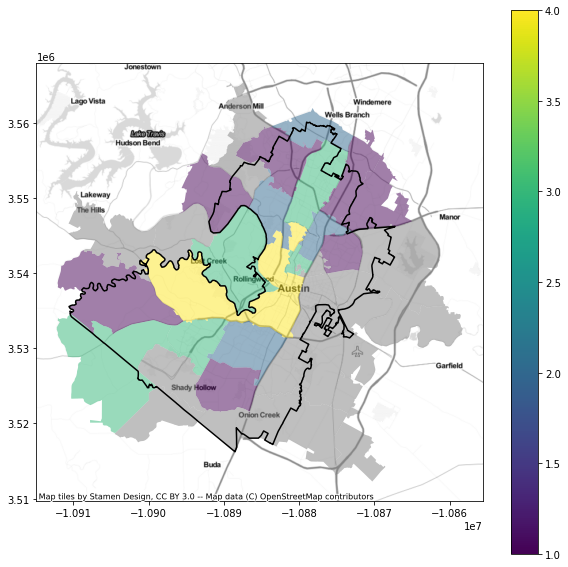

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
missing_kwds = dict(color='grey')
aisd_private_final.plot(column='school_count', ax=ax, missing_kwds=missing_kwds, alpha=0.5, legend=True)
aisd_boundary.exterior.plot(color='k', ax=ax)
#for idx, row in aisd_private_final.iterrows():
#    ax.text(s=row['GEOID10'], x=row['x'], y=row['y'], horizontalalignment='center')
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)

This is less helpful because it's focused on where the schools are, not where the students live.

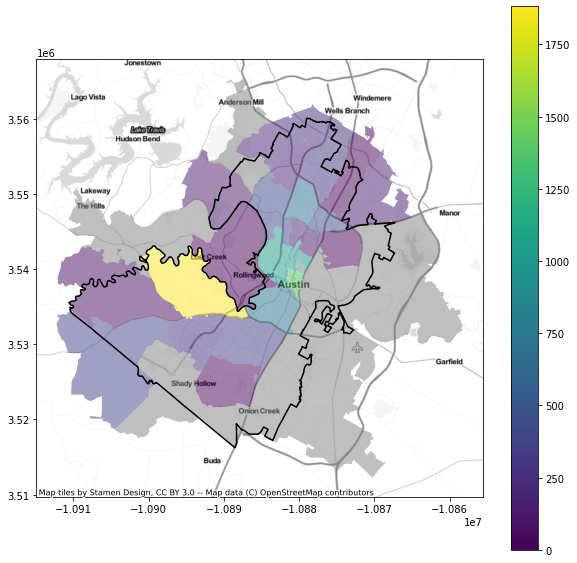

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
missing_kwds = dict(color='grey')
aisd_private_final.plot(column='Enrollment', ax=ax, missing_kwds=missing_kwds, alpha=0.5, legend=True)
aisd_boundary.exterior.plot(color='k', ax=ax)
#for idx, row in aisd_private_final.iterrows():
#    ax.text(s=row['GEOID10'], x=row['x'], y=row['y'], horizontalalignment='center')
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite)

## 2. Report on number of private schools in Austin-Round Rock MSA

In [42]:
austin_rr = set(['Travis', 'Hays', 'Williamson', 'Bastrop', 'Caldwell'])
private_arr = private[(private['County Name'].isin(austin_rr)) & (private['Closed'] == False)]

In [43]:
private_arr.head()

,School Name,School Number,Closed,School Street,School City,School State,School Zip,School Email,School Website,School Phone,...,District Website,District Phone,District Fax,District Contact Name,District Contact Name (last),District Contact Prefix,District Contact Title,County Name,County Number,Region Name
7,Academy of Thought and Industry,227510001,False,5815 Airport Blvd.,Austin,Texas,78752,jrichards@tohigherground.com,https://thoughtandindustry.com,(512) 910-8980,...,www.austinisd.org,(512) 414-1700,(512) 414-1486,DR MERIA J CARSTARPHEN,NaN,NaN,Superintendent,Travis,227,13.0
8,ACE Academy,227105001,False,3901 Shoal Creek Blvd,Austin,TX,78756,info@austingifted.org,www.austingifted.org,(512) 206-4070,...,www.austinisd.org,(512) 414-1700,(512) 414-1486,DR MERIA J CARSTARPHEN,NaN,NaN,Superintendent,Travis,227,13.0
10,Advent Ridge Academy,105179101,False,1523 Ranch RD 12,San Marcos,TX,78666,stephaniemardones@txsda.org,www.adventridge.org,(512) 392-9475,...,www.smcisd.net,(512) 393-6744,(512) 393-6709,MR MARK EADS,NaN,NaN,Superintendent,Hays,105,13.0
11,AESA Prep Academy,227109001,False,14101 Canonade,Austin,TX,78737,bgarza@aesaprepacademy.com,www.aesaprepacademy.org,(512) 560-5584,...,www.austinisd.org,(512) 414-1700,(512) 414-1486,DR MERIA J CARSTARPHEN,NaN,NaN,Superintendent,Travis,227,13.0
12,AESA Prep International (Digital Learning School),105300001,False,13730 W Highway 290,Austin,TX,78737,bgarza@aesapepacademy.com,http://aesaprepinternational.com/,(512) 560-5584,...,www.austinisd.org,(512) 414-1700,(512) 414-1486,DR MERIA J CARSTARPHEN,NaN,NaN,Superintendent,Hays,105,13.0


In [44]:
counties = gpd.read_file('/Users/kpierce/epimodels/notebooks/AustinGranularModel/Counties/texas_counties.shp')

In [45]:
sum(private_arr['County Name'].value_counts())

116

In [46]:
sum(private_arr['Enrollment'])

19708

In [47]:
msa = counties[counties['NAME'].isin(austin_rr)]

<AxesSubplot:>

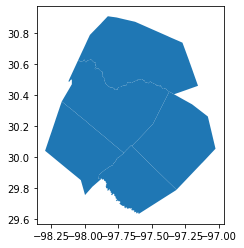

In [48]:
msa.plot()

In [49]:
not_msa = zcta[zcta.disjoint(msa.unary_union)]['GEOID10'].unique()

In [50]:
msa_border = gpd.GeoDataFrame(geometry=[msa.unary_union], crs=msa.crs)

<AxesSubplot:>

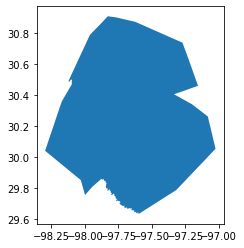

In [51]:
msa_border.plot()

In [52]:
len(not_msa)

1803

In [53]:
len(zcta['GEOID10'].unique())

1916

In [54]:
msa_zcta = zcta[~zcta['GEOID10'].isin(set(not_msa))]

<AxesSubplot:>

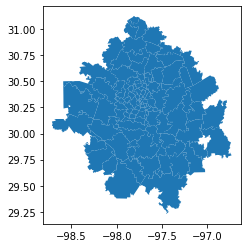

In [55]:
msa_zcta.plot()

In [56]:
private_msa_tally = private_arr.groupby(['School Zip'])['School Name'].count().reset_index().rename(columns={'School Name': 'school_count'})


In [57]:
private_msa_tally['school_count'].sum()

116

In [58]:
msa_private = pd.merge(
    msa_zcta,
    private_msa_tally,
    left_on='GEOID10',
    right_on='School Zip',
    how='outer'
)

In [59]:
msa_private_final = msa_private.to_crs(epsg=3857)
msa = msa.to_crs(epsg=3857)

In [60]:
msa['x'] = msa['geometry'].centroid.x
msa['y'] = msa['geometry'].centroid.y

In [61]:
msa.head()

,STATEFP,COUNTYFP,COUNTYNS,GEO_ID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,x,y
80,48,055,01383813,48055,Caldwell,Caldwell County,06,H1,G4020,None,12420,None,A,1.412165e+09,4958570.0,+29.8323986,-097.6281410,"POLYGON ((-10889596.863 3494764.284, -10889532...",-1.086701e+07,3.482647e+06
88,48,209,01383890,48209,Hays,Hays County,06,H1,G4020,None,12420,None,A,1.756076e+09,4940666.0,+30.0612247,-098.0292673,"POLYGON ((-10926184.685 3495109.826, -10926187...",-1.091277e+07,3.511054e+06
126,48,491,01384031,48491,Williamson,Williamson County,06,H1,G4020,None,12420,None,A,2.896487e+09,41622974.0,+30.6490817,-097.6050646,"POLYGON ((-10909087.013 3596466.016, -10909081...",-1.086488e+07,3.587151e+06
175,48,021,01383796,48021,Bastrop,Bastrop County,06,H1,G4020,None,12420,None,A,2.300440e+09,19009781.0,+30.1007718,-097.3106392,"POLYGON ((-10852676.752 3530843.848, -10852661...",-1.083272e+07,3.516910e+06
252,48,453,01384012,48453,Travis,Travis County,06,H1,G4020,None,12420,None,A,2.569871e+09,79794856.0,+30.2395128,-097.6912697,"POLYGON ((-10920196.365 3567652.976, -10920194...",-1.088504e+07,3.546675e+06


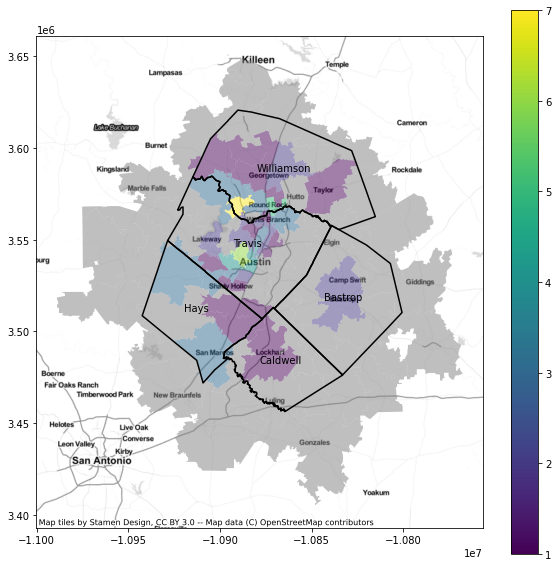

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
missing_kwds = dict(color='grey')
msa_private_final.plot(column='school_count', ax=ax, missing_kwds=missing_kwds, alpha=0.5, legend=True)
msa.boundary.plot(color='k', ax=ax)
for idx, row in msa.iterrows():
    ax.text(s=row['NAME'], x=row['x'], y=row['y'], horizontalalignment='center')
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite, zoom=9)

## 3. ZCTA-level private school attendance vs ZCTA-level private school capacity

See `enrollment_by_district.r` for full details on how enrollment data were collected from the US Census Bureau.

In [64]:
census_ps = gpd.read_file('/Users/kpierce/epimodels/notebooks/AustinGranularModel/Schools/data/2019_AustinMSA_Census_Private_School_Enrollment_Estimates.shp')


In [67]:
census_ps_columns = pd.read_csv('/Users/kpierce/epimodels/notebooks/AustinGranularModel/Schools/data/2019_AustinMSA_Census_Private_Public_School_Enrollment_Columns.csv')


In [68]:
[print(row.values) for i, row in census_ps_columns[['clean_label', 'private_label']].iterrows()]

['GEOID' 'GEOID']
['NAME' 'NAME']
['concept' 'concept']
['3up_enr'
 'Estimate!!Percent in private school!!Population 3 years and over enrolled in school']
['3up_prek'
 'Estimate!!Percent in private school!!Population 3 years and over enrolled in school!!Nursery school, preschool']
['3up_k12'
 'Estimate!!Percent in private school!!Population 3 years and over enrolled in school!!Kindergarten to 12th grade']
['3up_k'
 'Estimate!!Percent in private school!!Population 3 years and over enrolled in school!!Kindergarten to 12th grade!!Kindergarten']
['3up_1-4'
 'Estimate!!Percent in private school!!Population 3 years and over enrolled in school!!Kindergarten to 12th grade!!Elementary: grade 1 to grade 4']
['3up_5-8'
 'Estimate!!Percent in private school!!Population 3 years and over enrolled in school!!Kindergarten to 12th grade!!Elementary: grade 5 to grade 8']
['3up_9-12'
 'Estimate!!Percent in private school!!Population 3 years and over enrolled in school!!Kindergarten to 12th grade!!High sc

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [69]:
census_ps.head()

,GEOID,NAME_x,concept,3up_enr,3up_prk,3up_k12,3up_k,3up_1-4,3up_5-8,3p_9-12,...,35up_nr,18-24y,18-24y__,18-24y_m,18-24y_m__,18-24y_f,18-24y_f__,NAME_y,variabl,geometry
0,4800008,"Dripping Springs Independent School District, ...",SCHOOL ENROLLMENT,16.1,48.6,11.4,14.5,16.4,8.8,8.8,...,31.6,None,19.0,None,34.4,None,4.6,"Dripping Springs Independent School District, ...",B09001_001,"MULTIPOLYGON (((-98.22956 30.12058, -98.22580 ..."
1,4800009,"Wimberley Independent School District, Texas",SCHOOL ENROLLMENT,6.4,82.1,4.8,51.0,0.0,4.1,4.9,...,23.5,None,2.5,None,0.0,None,3.7,"Wimberley Independent School District, Texas",B09001_001,"POLYGON ((-98.25466 30.02081, -98.23445 30.020..."
2,4800010,"Hays Consolidated Independent School District,...",SCHOOL ENROLLMENT,9.6,32.3,7.1,14.2,7.2,9.5,2.7,...,21.6,None,6.6,None,6.6,None,6.7,"Hays Consolidated Independent School District,...",B09001_001,"POLYGON ((-98.08065 30.11523, -98.07035 30.115..."
3,4808940,"Austin Independent School District, Texas",SCHOOL ENROLLMENT,15.5,49.0,11.9,12.7,12.2,12.9,10.0,...,18.5,None,13.9,None,12.2,None,15.4,"Austin Independent School District, Texas",B09001_001,"POLYGON ((-98.01140 30.24862, -98.00775 30.250..."
4,4809570,"Bastrop Independent School District, Texas",SCHOOL ENROLLMENT,14.8,28.4,11.4,25.4,14.5,10.4,7.3,...,36.7,None,25.2,None,43.9,None,11.5,"Bastrop Independent School District, Texas",B09001_001,"POLYGON ((-97.63921 30.07829, -97.63365 30.083..."


In [70]:
census_ps = census_ps.to_crs(msa.crs)

In [71]:
census_ps.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [72]:
msa.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [75]:
census_pct_total = pd.read_csv("/Users/kpierce/epimodels/notebooks/AustinGranularModel/Schools/data/2019_Austin_Percent_and_Total_Private_Enrollment.csv")


In [76]:
census_total_private = census_pct_total[
    (census_pct_total['label'] == 'Estimate!!Total!!Population 3 years and over enrolled in school!!Kindergarten to 12th grade') &\
    (census_pct_total['measure_type'] == 'total_private')
]

In [77]:
census_total_private['GEOID'] = census_total_private['GEOID'].astype(str)
census_ps['GEOID'] = census_ps['GEOID'].astype(str)

/var/folders/hn/w8yttt8x7k5141wgqdcfv7fh0000gr/T/ipykernel_50002/3544105859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_total_private['GEOID'] = census_total_private['GEOID'].astype(str)


In [78]:
census_total_private.head()

,Unnamed: 0,GEOID,NAME,label,estimate,measure_type
2960,2961,4800008,"Dripping Springs Independent School District, ...",Estimate!!Total!!Population 3 years and over e...,744.420,total_private
2994,2995,4800009,"Wimberley Independent School District, Texas",Estimate!!Total!!Population 3 years and over e...,108.000,total_private
3028,3029,4800010,"Hays Consolidated Independent School District,...",Estimate!!Total!!Population 3 years and over e...,1408.782,total_private
3062,3063,4808940,"Austin Independent School District, Texas",Estimate!!Total!!Population 3 years and over e...,11219.082,total_private
3096,3097,4809570,"Bastrop Independent School District, Texas",Estimate!!Total!!Population 3 years and over e...,1287.744,total_private


In [79]:
census_total_private = gpd.GeoDataFrame(
    pd.merge(
        census_total_private,
        census_ps[['GEOID', 'geometry']],
        on='GEOID',
        how='left'
    ),
    crs=census_ps.crs
)

In [80]:
census_total_private.head()

,Unnamed: 0,GEOID,NAME,label,estimate,measure_type,geometry
0,2961,4800008,"Dripping Springs Independent School District, ...",Estimate!!Total!!Population 3 years and over e...,744.420,total_private,"MULTIPOLYGON (((-10934864.600 3519058.199, -10..."
1,2995,4800009,"Wimberley Independent School District, Texas",Estimate!!Total!!Population 3 years and over e...,108.000,total_private,"POLYGON ((-10937658.385 3506225.184, -10935409..."
2,3029,4800010,"Hays Consolidated Independent School District,...",Estimate!!Total!!Population 3 years and over e...,1408.782,total_private,"POLYGON ((-10918287.681 3518370.845, -10917141..."
3,3063,4808940,"Austin Independent School District, Texas",Estimate!!Total!!Population 3 years and over e...,11219.082,total_private,"POLYGON ((-10910579.363 3535547.567, -10910173..."
4,3097,4809570,"Bastrop Independent School District, Texas",Estimate!!Total!!Population 3 years and over e...,1287.744,total_private,"POLYGON ((-10869146.916 3513617.268, -10868528..."


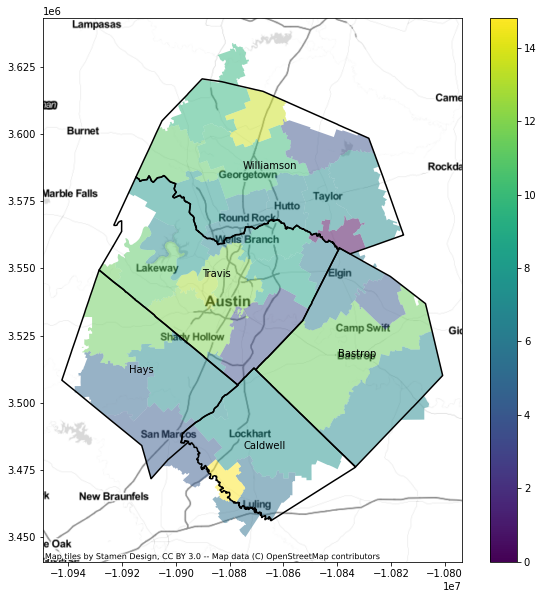

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
missing_kwds = dict(color='grey')
census_ps.plot(column='3up_k12', ax=ax, missing_kwds=missing_kwds, alpha=0.5, legend=True)
msa.boundary.plot(color='k', ax=ax)
for idx, row in msa.iterrows():
    ax.text(s=row['NAME'], x=row['x'], y=row['y'], horizontalalignment='center')
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite, zoom=9)

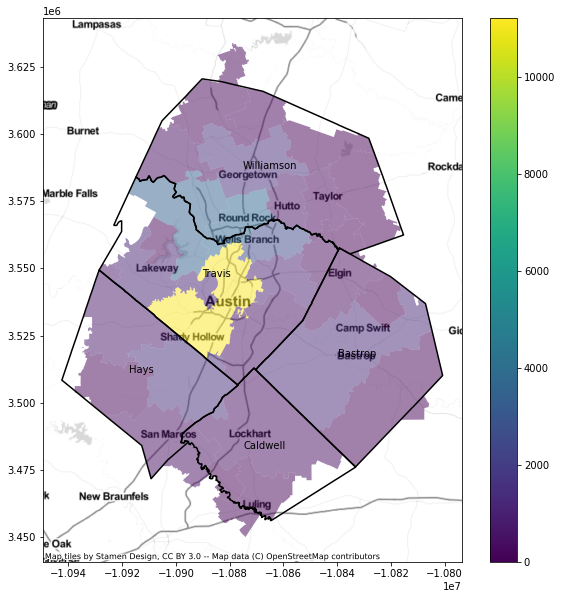

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
missing_kwds = dict(color='grey')
census_total_private.plot(column='estimate', ax=ax, missing_kwds=missing_kwds, alpha=0.5, legend=True)
msa.boundary.plot(color='k', ax=ax)
for idx, row in msa.iterrows():
    ax.text(s=row['NAME'], x=row['x'], y=row['y'], horizontalalignment='center')
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite, zoom=9)

In [83]:
sum(census_total_private['estimate'])

32033.294

In [84]:
private_arr.columns

Index(['School Name', 'School Number', 'Closed', 'School Street',
       'School City', 'School State', 'School Zip', 'School Email',
       'School Website', 'School Phone', 'School Fax', 'Principal Name',
       'Principal Name (last)', 'Principal Prefix', 'Principal Title',
       'Grade Low', 'Grade High', 'Enrollment', 'School Accreditations',
       'Diocese Name', 'Diocese Code', 'Diocese Street', 'Diocese City',
       'Diocese State', 'Diocese Zip', 'Diocese Email', 'Diocese Website',
       'Diocese Phone', 'Diocese Fax', 'Diocese Contact Name',
       'Diocese Contact Name (last)', 'Diocese Contact Prefix',
       'Diocese Contact Title', 'District Name', 'District Number',
       'District Type', 'District Enrollment', 'District Street',
       'District City', 'District State', 'District Zip', 'District Email',
       'District Website', 'District Phone', 'District Fax',
       'District Contact Name', 'District Contact Name (last)',
       'District Contact Prefix', 'Dist

In [85]:
tepsac_by_district = private_arr.groupby(['District Name', 'County Name']).aggregate(
    {'Enrollment': 'sum'}
).reset_index()

In [86]:
tepsac_by_district.head()

,District Name,County Name,Enrollment
0,AUSTIN ISD,Hays,3
1,AUSTIN ISD,Travis,10335
2,BASTROP ISD,Bastrop,167
3,BRENHAM ISD,Williamson,0
4,DRIPPING SPRINGS ISD,Hays,98


In [87]:
county_counts = private['County Name'].value_counts().reset_index()
county_counts[county_counts['index'].isin(austin_rr)]

,index,County Name
4,Travis,85
9,Williamson,30
19,Hays,11
69,Bastrop,2
97,Caldwell,1


In [88]:
private[private['County Name'] == 'Caldwell']['Enrollment']

603    0
Name: Enrollment, dtype: int64

In [89]:
private[private['County Name'] == 'Bastrop']['Enrollment']

111    136
351     31
Name: Enrollment, dtype: int64

In [90]:
print(census_total_private[census_total_private['GEOID'] == '4808940']['label'].values)

['Estimate!!Total!!Population 3 years and over enrolled in school!!Kindergarten to 12th grade']


In [91]:
census_austin_public = census_pct_total[
    (census_pct_total['measure_type'] == 'total_public') &\
    (census_pct_total['NAME'] == 'Austin Independent School District, Texas') &\
    (census_pct_total['label'] == 'Estimate!!Total!!Population 3 years and over enrolled in school!!Kindergarten to 12th grade')
]

In [92]:
census_austin_public

,Unnamed: 0,GEOID,NAME,label,estimate,measure_type
2076,2077,4808940,"Austin Independent School District, Texas",Estimate!!Total!!Population 3 years and over e...,83058.918,total_public


In [93]:
census_austin_private = census_pct_total[
    (census_pct_total['measure_type'] == 'total_private') &\
    (census_pct_total['NAME'] == 'Austin Independent School District, Texas') &\
    (census_pct_total['label'] == 'Estimate!!Total!!Population 3 years and over enrolled in school!!Kindergarten to 12th grade')
]

In [94]:
census_austin_private

,Unnamed: 0,GEOID,NAME,label,estimate,measure_type
3062,3063,4808940,"Austin Independent School District, Texas",Estimate!!Total!!Population 3 years and over e...,11219.082,total_private


In [95]:
census_austin = census_pct_total[
    (census_pct_total['NAME'] == 'Austin Independent School District, Texas') &\
    (census_pct_total['label'] == 'Estimate!!Total!!Population 3 years and over enrolled in school!!Kindergarten to 12th grade')
]

In [96]:
census_austin

,Unnamed: 0,GEOID,NAME,label,estimate,measure_type
1090,1091,4808940,"Austin Independent School District, Texas",Estimate!!Total!!Population 3 years and over e...,94278.000,total_private_public
2076,2077,4808940,"Austin Independent School District, Texas",Estimate!!Total!!Population 3 years and over e...,83058.918,total_public
3062,3063,4808940,"Austin Independent School District, Texas",Estimate!!Total!!Population 3 years and over e...,11219.082,total_private


In [88]:
11219.082/94278

0.11900000000000001

We can't compare the US Census Bureau 5-Year ACS 2019 private school enrollment numbers with the 2019 TEPSAC enrollment numbers because TEPSAC has not reported them.

## 4. Number of schools changed between the 2015-2016 SABS survey and the 2019 TEA school enrollment report

See SchoolCatchmentDemo.ipynb for notes on creation of the files used below.

In [97]:
school_locations_2019 = gpd.read_file('/Users/kpierce/epimodels/notebooks/AustinGranularModel/Schools/data/2019_Schools_joined_with_2015_2016_catchments_points_only.shp')


In [98]:
school_locations_2019.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [99]:
school_locations_2019 = school_locations_2019.to_crs(msa.crs)

In [100]:
school_locations_2019_in_msa = school_locations_2019.sjoin(msa, how='inner', predicate='within').drop(['x_left', 'x_right', 'y_left', 'y_right'], axis=1)

In [101]:
school_locations_2019_in_msa['geometry']

0      POINT (-10850493.610 3521346.386)
1      POINT (-10833074.728 3518794.501)
2      POINT (-10833074.728 3518794.501)
3      POINT (-10840060.355 3548335.024)
4      POINT (-10824658.749 3540039.558)
                     ...                
896    POINT (-10875366.188 3569325.529)
897    POINT (-10875366.188 3569325.529)
915    POINT (-10871369.850 3583166.656)
916    POINT (-10871369.850 3583166.656)
917    POINT (-10871369.850 3583166.656)
Name: geometry, Length: 785, dtype: geometry

In [102]:
school_locations_2019_in_msa.head()

,DistrictNu,DistrictNa,County,Zip,SchoolName,SchoolNumb,GradeLevel,SchoolEnro,index_righ,ncessch,...,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
0,011901,BASTROP ISD,BASTROP COUNTY,78612.0,CEDAR CREEK H S,011901002,High School,1583.0,11863.0,480957012272,...,H1,G4020,None,12420,None,A,2.300440e+09,19009781.0,+30.1007718,-097.3106392
1,011901,BASTROP ISD,BASTROP COUNTY,78602.0,COLORADO RIVER COLLEGIATE ACADEMY,011901005,High School,206.0,11862.0,480957000409,...,H1,G4020,None,12420,None,A,2.300440e+09,19009781.0,+30.1007718,-097.3106392
2,011901,BASTROP ISD,BASTROP COUNTY,78602.0,GENESIS H S,011901022,High School,115.0,11862.0,480957000409,...,H1,G4020,None,12420,None,A,2.300440e+09,19009781.0,+30.1007718,-097.3106392
3,011902,ELGIN ISD,BASTROP COUNTY,78621.0,PHOENIX H S,011902004,High School,50.0,12134.0,481836001728,...,H1,G4020,None,12420,None,A,2.300440e+09,19009781.0,+30.1007718,-097.3106392
4,011905,MCDADE ISD,BASTROP COUNTY,78650.0,MCDADE JJAEP,011905011,High School,0.0,NaN,None,...,H1,G4020,None,12420,None,A,2.300440e+09,19009781.0,+30.1007718,-097.3106392


In [103]:
len(school_locations_2019_in_msa['DistrictNa'].unique())

52

In [104]:
len(school_locations_2019_in_msa['SchoolNumb'].unique())

559

In [105]:
school_locations_2019_in_msa['DistrictNa'].value_counts()

AUSTIN ISD                                       139
MANOR ISD                                         97
ROUND ROCK ISD                                    70
LEANDER ISD                                       60
PFLUGERVILLE ISD                                  36
LOCKHART ISD                                      33
HAYS CISD                                         26
GEORGETOWN ISD                                    26
LIBERTY HILL ISD                                  19
BASTROP ISD                                       18
KIPP TEXAS PUBLIC SCHOOLS                         18
UNIVERSITY OF TEXAS UNIVERSITY CHARTER SCHOOL     17
HUTTO ISD                                         16
TAYLOR ISD                                        15
DEL VALLE ISD                                     15
LAKE TRAVIS ISD                                   13
EANES ISD                                         13
JARRELL ISD                                       11
SAN MARCOS CISD                               

In [106]:
559-139

420

In [107]:
school_locations_2019_in_msa['has_catchment'] = [
    'catchment' if i == True else 'no catchment' for i in school_locations_2019_in_msa['has_catchm']
]

In [108]:
school_locations_2019_in_msa[school_locations_2019_in_msa['has_catchm'] == False]['DistrictNa'].value_counts()


AUSTIN ISD                                       131
UNIVERSITY OF TEXAS UNIVERSITY CHARTER SCHOOL      8
KIPP TEXAS PUBLIC SCHOOLS                          8
HARMONY SCIENCE ACADEMY (AUSTIN)                   4
WAYSIDE SCHOOLS                                    4
DEL VALLE ISD                                      3
MANOR ISD                                          3
MCDADE ISD                                         2
TEXAS EMPOWERMENT ACADEMY                          2
PROMESA PUBLIC SCHOOLS                             2
GRANGER ISD                                        2
THE EXCEL CENTER (FOR ADULTS)                      2
CEDARS INTERNATIONAL ACADEMY                       2
UNIVERSITY OF TEXAS ELEMENTARY CHARTER SCHOOL      1
TEXAS PREPARATORY SCHOOL                           1
UNIVERSITY OF TEXAS AT AUSTIN H S                  1
NYOS CHARTER SCHOOL                                1
LAGO VISTA ISD                                     1
AUSTIN ACHIEVE PUBLIC SCHOOLS                 

In [109]:
not_aisd = school_locations_2019_in_msa[(school_locations_2019_in_msa['has_catchm'] == False) &\
                             (school_locations_2019_in_msa['DistrictNa'] != 'AUSTIN ISD')]['DistrictNa'].value_counts()


In [110]:
sum(not_aisd)

55

In [111]:
len(not_aisd)

25

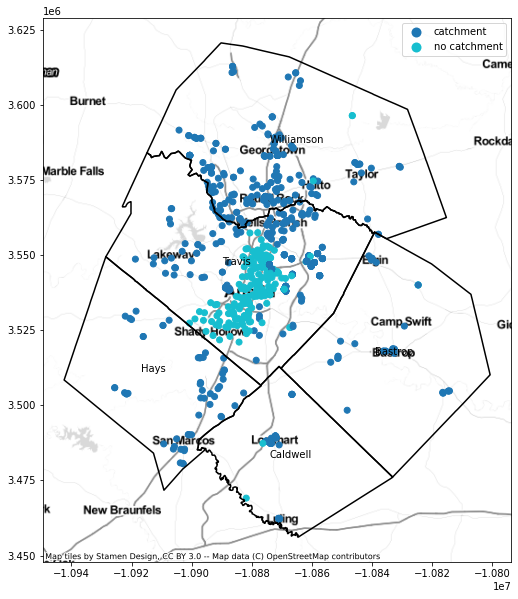

In [112]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
school_locations_2019_in_msa.plot(
    marker='o', ax=ax, 
    column='has_catchment', categorical=True,
    label='SABS Response', legend=True
)
msa.boundary.plot(color='k', ax=ax)
for idx, row in msa.iterrows():
    ax.text(s=row['NAME'], x=row['x'], y=row['y'], horizontalalignment='center')
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite, zoom=9)

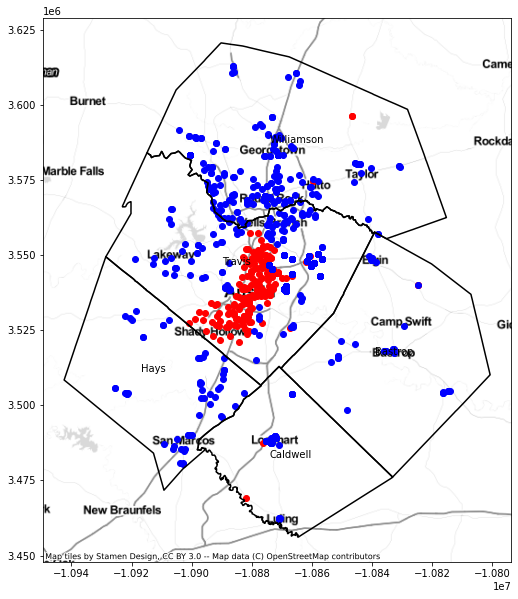

In [113]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
school_locations_2019_in_msa[school_locations_2019_in_msa['has_catchm'] == 0].plot(
    marker='o', color='red', ax=ax, label='SABS Response', legend=True)
school_locations_2019_in_msa[school_locations_2019_in_msa['has_catchm'] == 1].plot(marker='o', color='blue', ax=ax)
msa.boundary.plot(color='k', ax=ax)
for idx, row in msa.iterrows():
    ax.text(s=row['NAME'], x=row['x'], y=row['y'], horizontalalignment='center')
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite, zoom=9)